# Illustration of a practical data wrangling task

In this Notebook, we will show a practical data wrangling task step-by-step - how it is structured, what you should watch for, and how to improvise.

### The task
Imagine the question: ***"In India, did the enrollment in primary/secondary/tertiary education increase with improvement of per capita GDP in the past 15 years?"***

Now, the actual modeling and analysis will be done by some senior data scientist, who will use some machine learning and visualization for the job. As a data wrangling expert, **your job is to acquire and provide her with a clean dataset which contains educational enrollment and GDP data side by side.**

### The data source

Suppose you have a link for a **[dataset from the United Nations](http://data.un.org)** and you can download the dataset of education (for all the nations around the world). But this dataset has some missing values and moreover it does not have any GDP information. Someone has given you another separate CSV file (downloaded from the World Bank site) which contains GDP data but in a messy format.

In this notebook, we will examine how to handle these two separate sources and to clean the data to prepare a simple final dataset with the required data and save it to the local drive as a SQL database file.

The link for the education data: http://data.un.org/_Docs/SYB/CSV/SYB61_T07_Education.csv

The link for the GDP data (hosted on Packt Github repository for this course): https://github.com/TrainingByPackt/Data-Wrangling-with-Python/blob/master/Lesson09/Activity25/India_World_Bank_Info.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### URL of the dataset

In [2]:
education_data_link="http://data.un.org/_Docs/SYB/CSV/SYB61_T07_Education.csv"

### Use `pd.read_csv()` method of Pandas to directly pass this link and create a DataFrame.

In [3]:
df1 = pd.read_csv(education_data_link)

In [4]:
df1.head()

,T07,"Enrolment in primary, secondary and tertiary education levels",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN,"United Nations Educational, Scientific and Cul..."


### The first row does not contain useful information. We should use `skiprows` parameter

In [5]:
df1 = pd.read_csv(education_data_link,skiprows=1)

In [6]:
df1.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN,"United Nations Educational, Scientific and Cul..."
1,1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN,"United Nations Educational, Scientific and Cul..."
2,1,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN,"United Nations Educational, Scientific and Cul..."
3,1,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN,"United Nations Educational, Scientific and Cul..."
4,1,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7,NaN,"United Nations Educational, Scientific and Cul..."


### Drop the column `Region/Country/Area` and `Source`. They don't look useful

In [7]:
df2 = df1.drop(['Region/Country/Area','Source'],axis=1)

### Assign the following names as the columns of the dataframe: `['Region/Country/Area','Year','Data','Value','Footnotes']`

In [8]:
df2.columns=['Region/Country/Area','Year','Data','Enrollments (Thousands)','Footnotes']

In [9]:
df2.head()

,Region/Country/Area,Year,Data,Enrollments (Thousands),Footnotes
0,"Total, all countries or areas",2005,Students enrolled in primary education (thousa...,"678,990",NaN
1,"Total, all countries or areas",2005,Gross enrollement ratio - Primary (male),104.8,NaN
2,"Total, all countries or areas",2005,Gross enrollment ratio - Primary (female),99.8,NaN
3,"Total, all countries or areas",2005,Students enrolled in secondary education (thou...,"509,100",NaN
4,"Total, all countries or areas",2005,Gross enrollment ratio - Secondary (male),65.7,NaN


### Why don't we drop the `Footnotes` column?

If you download the CSV file and open it using Excel then you will see the `Footnotes` column sometimes contain useful notes. We may not want to drop it in the beginning. If we are interested in particular country's data (like we are in this task) then it may well turn out that `Footnotes` will be `NaN` i.e. blank. In that case, we can drop it at the end. But for some countries or region it may contain information.

We can, of course, check how many unique values the `Footnotes` column contains.

In [10]:
df2['Footnotes'].unique()

array([nan, 'Estimate.',
       'For statistical purposes, the data for China do not include those for the Hong Kong Special Administrative Region (Hong Kong SAR), Macao Special Administrative Region (Macao SAR) and Taiwan Province of China.'],
      dtype=object)

### The `Value` column data is not numeric but we need them to be numbers for further processing

In [11]:
type(df2['Enrollments (Thousands)'][0])

str

### Write a small utility function to convert the strings in `Value` column to floating point numbers

In [12]:
def to_numeric(val):
    """
    Converts a given string (with one or more commas) to a numeric value
    """
    if ',' not in str(val):
        result = float(val)
    else:
        val=str(val)
        val=''.join(str(val).split(','))
        result=float(val)
    return result

### Use the `apply()` method to apply this function to the `Value` column data

In [13]:
df2['Enrollments (Thousands)']=df2['Enrollments (Thousands)'].apply(to_numeric)

### Print unique types of data in the `Data` column

In [14]:
df2['Data'].unique()

array(['Students enrolled in primary education (thousands)',
       'Gross enrollement ratio - Primary (male)',
       'Gross enrollment ratio - Primary (female)',
       'Students enrolled in secondary education (thousands)',
       'Gross enrollment ratio - Secondary (male)',
       'Gross enrollment ratio - Secondary (female)',
       'Students enrolled in tertiary education (thousands)',
       'Gross enrollment ratio - Tertiary (male)',
       'Gross enrollment ratio - Tertiary (female)'], dtype=object)

### Create three DataFrames by filtering and selecting from the original DataFrame
* **`df_primary`**: Only *"Students enrolled in primary education (thousands)"*
* **`df_secondary`**: Only *"Students enrolled in secondary education (thousands)"*
* **`df_tertiary`**: Only *"Students enrolled in tertiary education (thousands)"*

In [15]:
df_primary = df2[df2['Data']=='Students enrolled in primary education (thousands)']
df_secondary = df2[df2['Data']=='Students enrolled in secondary education (thousands)']
df_tertiary = df2[df2['Data']=='Students enrolled in tertiary education (thousands)']

### Make bar charts of primary students enrollment in a low-income country like India and a high-income country like USA.

In [16]:
primary_enrollment_india = df_primary[df_primary['Region/Country/Area']=='India']
primary_enrollment_USA = df_primary[df_primary['Region/Country/Area']=='United States of America']

In [17]:
primary_enrollment_india

,Region/Country/Area,Year,Data,Enrollments (Thousands),Footnotes
3729,India,2003,Students enrolled in primary education (thousa...,125569.0,NaN
3744,India,2010,Students enrolled in primary education (thousa...,138414.0,NaN
3753,India,2014,Students enrolled in primary education (thousa...,137809.0,NaN
3762,India,2015,Students enrolled in primary education (thousa...,138518.0,NaN
3771,India,2016,Students enrolled in primary education (thousa...,145803.0,NaN


In [18]:
primary_enrollment_USA

,Region/Country/Area,Year,Data,Enrollments (Thousands),Footnotes
7858,United States of America,2005,Students enrolled in primary education (thousa...,24455.0,NaN
7865,United States of America,2010,Students enrolled in primary education (thousa...,24393.0,NaN
7872,United States of America,2014,Students enrolled in primary education (thousa...,24538.0,NaN
7879,United States of America,2015,Students enrolled in primary education (thousa...,24786.0,NaN


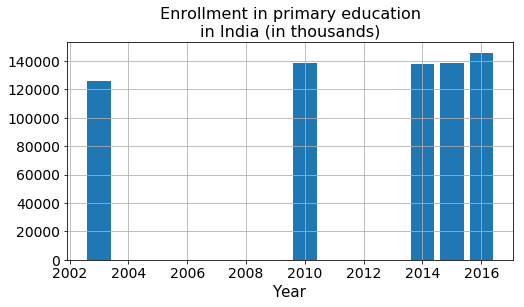

In [19]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_india['Year'],primary_enrollment_india['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin India (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.show()

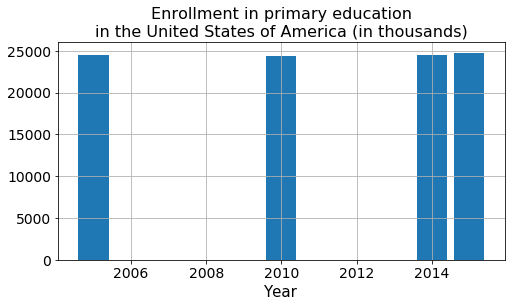

In [20]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_USA['Year'],primary_enrollment_USA['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin the United States of America (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.show()

### Data imputation

Clearly, we are missing some data. Let's say we decide to **impute these data points by simple linear interpolation between available data points.**

We can take out a pen and paper or a calculator, and compute those values and manually create a dataset somewhow. But being a data wrangler, we will of course take advantage of Python programming, and use Pandas imputation methods for this task. 

But to do that, we first need to create a dataframe with missing values inserted i.e. we need to append another dataframe with missing values to the current dataframe. 

### (For India) Append rows corresponding to missing years - 2004 - 2009, 2011 - 2013

In [21]:
missing_years = [y for y in range(2004,2010)]+[y for y in range(2011,2014)]

In [22]:
missing_years

[2004, 2005, 2006, 2007, 2008, 2009, 2011, 2012, 2013]

#### Creating a dictionary of values with `np.nan`.  Note, there are 9 mising data points, so we need to create list with identical values repeated 9 times.

In [23]:
dict_missing = {'Region/Country/Area':['India']*9,'Year':missing_years,
                'Data':'Students enrolled in primary education (thousands)'*9,
                'Enrollments (Thousands)':[np.nan]*9,'Footnotes':[np.nan]*9}

#### Create a dataframe of missing values (from the dictionary above) which we can append

In [24]:
df_missing = pd.DataFrame(data=dict_missing)

#### Appending...

In [25]:
primary_enrollment_india=primary_enrollment_india.append(df_missing,ignore_index=True,sort=True)

In [26]:
primary_enrollment_india

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,125569.0,NaN,India,2003
1,Students enrolled in primary education (thousa...,138414.0,NaN,India,2010
2,Students enrolled in primary education (thousa...,137809.0,NaN,India,2014
3,Students enrolled in primary education (thousa...,138518.0,NaN,India,2015
4,Students enrolled in primary education (thousa...,145803.0,NaN,India,2016
5,Students enrolled in primary education (thousa...,NaN,NaN,India,2004
6,Students enrolled in primary education (thousa...,NaN,NaN,India,2005
7,Students enrolled in primary education (thousa...,NaN,NaN,India,2006
8,Students enrolled in primary education (thousa...,NaN,NaN,India,2007
9,Students enrolled in primary education (thousa...,NaN,NaN,India,2008


### Sort by `Year` and reset the indices using `reset_index()`. Use `inplace=True` to execute the changes on the dataframe itself.

In [27]:
primary_enrollment_india.sort_values(by='Year',inplace=True)

In [28]:
primary_enrollment_india.reset_index(inplace=True,drop=True)

In [29]:
primary_enrollment_india

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,125569.0,NaN,India,2003
1,Students enrolled in primary education (thousa...,NaN,NaN,India,2004
2,Students enrolled in primary education (thousa...,NaN,NaN,India,2005
3,Students enrolled in primary education (thousa...,NaN,NaN,India,2006
4,Students enrolled in primary education (thousa...,NaN,NaN,India,2007
5,Students enrolled in primary education (thousa...,NaN,NaN,India,2008
6,Students enrolled in primary education (thousa...,NaN,NaN,India,2009
7,Students enrolled in primary education (thousa...,138414.0,NaN,India,2010
8,Students enrolled in primary education (thousa...,NaN,NaN,India,2011
9,Students enrolled in primary education (thousa...,NaN,NaN,India,2012


### Use `interpolate` method for linear interpolation. It fills all the `NaN` by linearly interpolated values.

See this link for more details about this method: http://pandas.pydata.org/pandas-docs/version/0.17/generated/pandas.DataFrame.interpolate.html

In [30]:
primary_enrollment_india.interpolate(inplace=True)

In [31]:
primary_enrollment_india

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year
0,Students enrolled in primary education (thousa...,125569.00,NaN,India,2003
1,Students enrolled in primary education (thousa...,127404.00,NaN,India,2004
2,Students enrolled in primary education (thousa...,129239.00,NaN,India,2005
3,Students enrolled in primary education (thousa...,131074.00,NaN,India,2006
4,Students enrolled in primary education (thousa...,132909.00,NaN,India,2007
5,Students enrolled in primary education (thousa...,134744.00,NaN,India,2008
6,Students enrolled in primary education (thousa...,136579.00,NaN,India,2009
7,Students enrolled in primary education (thousa...,138414.00,NaN,India,2010
8,Students enrolled in primary education (thousa...,138262.75,NaN,India,2011
9,Students enrolled in primary education (thousa...,138111.50,NaN,India,2012


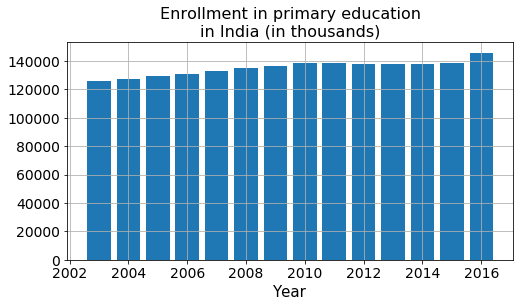

In [32]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_india['Year'],primary_enrollment_india['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin India (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.show()

### Repeat the same steps for USA

In [33]:
missing_years = [2004]+[y for y in range(2006,2010)]+[y for y in range(2011,2014)]+[2016]

In [34]:
missing_years

[2004, 2006, 2007, 2008, 2009, 2011, 2012, 2013, 2016]

In [35]:
dict_missing = {'Region/Country/Area':['United States of America']*9,'Year':missing_years,
                'Data':'Students enrolled in primary education (thousands)'*9,
                'Value':[np.nan]*9,'Footnotes':[np.nan]*9}

In [36]:
df_missing = pd.DataFrame(data=dict_missing)

In [37]:
primary_enrollment_USA=primary_enrollment_USA.append(df_missing,ignore_index=True,sort=True)

In [38]:
primary_enrollment_USA.sort_values(by='Year',inplace=True)

In [39]:
primary_enrollment_USA.reset_index(inplace=True,drop=True)

In [40]:
primary_enrollment_USA.interpolate(inplace=True)

In [41]:
primary_enrollment_USA

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Value,Year
0,Students enrolled in primary education (thousa...,NaN,NaN,United States of America,NaN,2004
1,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,NaN,2005
2,Students enrolled in primary education (thousa...,24442.60,NaN,United States of America,NaN,2006
3,Students enrolled in primary education (thousa...,24430.20,NaN,United States of America,NaN,2007
4,Students enrolled in primary education (thousa...,24417.80,NaN,United States of America,NaN,2008
5,Students enrolled in primary education (thousa...,24405.40,NaN,United States of America,NaN,2009
6,Students enrolled in primary education (thousa...,24393.00,NaN,United States of America,NaN,2010
7,Students enrolled in primary education (thousa...,24429.25,NaN,United States of America,NaN,2011
8,Students enrolled in primary education (thousa...,24465.50,NaN,United States of America,NaN,2012
9,Students enrolled in primary education (thousa...,24501.75,NaN,United States of America,NaN,2013


### Still the first value is unfilled. We can use `limit` and `limit_direction` parameters with `interpolate()` method to fill that.

How did we know this? By searching on Google and looking at this Stackoverflow page. 

Always, search for solution to your problem and look for what has already been done and try to implement that.

In [42]:
primary_enrollment_USA.interpolate(method='linear',limit_direction='backward',limit=1)

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Value,Year
0,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,NaN,2004
1,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,NaN,2005
2,Students enrolled in primary education (thousa...,24442.60,NaN,United States of America,NaN,2006
3,Students enrolled in primary education (thousa...,24430.20,NaN,United States of America,NaN,2007
4,Students enrolled in primary education (thousa...,24417.80,NaN,United States of America,NaN,2008
5,Students enrolled in primary education (thousa...,24405.40,NaN,United States of America,NaN,2009
6,Students enrolled in primary education (thousa...,24393.00,NaN,United States of America,NaN,2010
7,Students enrolled in primary education (thousa...,24429.25,NaN,United States of America,NaN,2011
8,Students enrolled in primary education (thousa...,24465.50,NaN,United States of America,NaN,2012
9,Students enrolled in primary education (thousa...,24501.75,NaN,United States of America,NaN,2013


In [43]:
primary_enrollment_USA

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Value,Year
0,Students enrolled in primary education (thousa...,NaN,NaN,United States of America,NaN,2004
1,Students enrolled in primary education (thousa...,24455.00,NaN,United States of America,NaN,2005
2,Students enrolled in primary education (thousa...,24442.60,NaN,United States of America,NaN,2006
3,Students enrolled in primary education (thousa...,24430.20,NaN,United States of America,NaN,2007
4,Students enrolled in primary education (thousa...,24417.80,NaN,United States of America,NaN,2008
5,Students enrolled in primary education (thousa...,24405.40,NaN,United States of America,NaN,2009
6,Students enrolled in primary education (thousa...,24393.00,NaN,United States of America,NaN,2010
7,Students enrolled in primary education (thousa...,24429.25,NaN,United States of America,NaN,2011
8,Students enrolled in primary education (thousa...,24465.50,NaN,United States of America,NaN,2012
9,Students enrolled in primary education (thousa...,24501.75,NaN,United States of America,NaN,2013


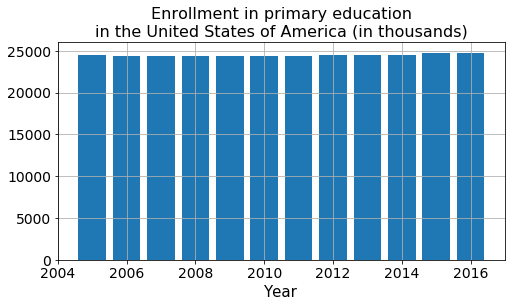

In [44]:
plt.figure(figsize=(8,4))
plt.bar(primary_enrollment_USA['Year'],primary_enrollment_USA['Enrollments (Thousands)'])
plt.title("Enrollment in primary education\nin the United States of America (in thousands)",fontsize=16)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Year", fontsize=15)
plt.show()

### GDP data for India

We will try to read the GDP data for India from a CSV file found in a World Bank portal. It is given to you and also hosted on the Packt Gihub repo. 

But the Pandas `read_csv()` method will throw error in we try to read it normally. Let's see step-by-step how we can read useful information from it. 

In [45]:
df3=pd.read_csv("India_World_Bank_Info.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 3


### We can try `error_bad_lines=False` option in this kind of situation

In [ ]:
df3=pd.read_csv("India_World_Bank_Info.csv",error_bad_lines=False)

In [47]:
df3.head(10)

,Data Source World Development Indicators
0,Last Updated Date\t11/14/2018\t\t\t\t\t\t\t\t\...
1,Country Name\tCountry Code\tIndicator Name\t19...
2,India\tIND\tBattle-related deaths (number of p...
3,India\tIND\tTravel services (% of commercial s...
4,India\tIND\tTransport services (% of commercia...
5,India\tIND\tHigh-technology exports (% of manu...
6,India\tIND\tHigh-technology exports (current U...
7,India\tIND\tCommercial service exports (curren...
8,India\tIND\tExport value index (2000 = 100)\t\...
9,India\tIND\tMerchandise exports to low- and mi...


### Clearly, the delimiter in this file is not `,` but tab (`\t`)

In [48]:
df3=pd.read_csv("India_World_Bank_Info.csv",error_bad_lines=False,delimiter='\t')

In [49]:
df3.head(10)

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Last Updated Date,11/14/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Country Name,Country Code,Indicator Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,...,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2017.0
4,India,IND,"Presence of peace keepers (number of troops, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,India,IND,"Intentional homicides (per 100,000 people)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.842386e+00,3.773790e+00,3.774227e+00,3.819646e+00,3.758949e+00,3.588249e+00,3.660058e+00,3.390616e+00,3.223699e+00,NaN
6,India,IND,"Intentional homicides, male (per 100,000 male)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.672067e+00,4.441221e+00,4.477722e+00,4.468985e+00,4.431416e+00,4.218435e+00,4.333956e+00,4.020842e+00,3.735951e+00,NaN
7,India,IND,"Intentional homicides, female (per 100,000 fem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.948596e+00,3.054638e+00,3.016158e+00,3.119986e+00,3.034514e+00,2.909561e+00,2.934533e+00,2.712336e+00,2.672389e+00,NaN
8,India,IND,"Internally displaced persons, total displaced ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000e+05,6.500000e+05,6.500000e+05,1.000000e+06,5.260000e+05,8.540000e+05,6.120000e+05,7.960000e+05,806000.0
9,India,IND,"Internally displaced persons, new displacement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.662000e+06,5.304000e+06,1.411000e+06,1.503000e+06,9.110000e+06,2.145000e+06,3.428000e+06,3.655000e+06,2.400000e+06,1346000.0


### Again, the first 4 rows do not seem to be useful, so we can use `skiprows` parameter

In [50]:
df3=pd.read_csv("India_World_Bank_Info.csv",error_bad_lines=False,delimiter='\t',skiprows=4)

In [51]:
df3.head(10)

,Country Name,Country Code,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,India,IND,"Presence of peace keepers (number of troops, p...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Intentional homicides (per 100,000 people)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.842386e+00,3.773790e+00,3.774227e+00,3.819646e+00,3.758949e+00,3.588249e+00,3.660058e+00,3.390616e+00,3.223699e+00,NaN
2,India,IND,"Intentional homicides, male (per 100,000 male)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.672067e+00,4.441221e+00,4.477722e+00,4.468985e+00,4.431416e+00,4.218435e+00,4.333956e+00,4.020842e+00,3.735951e+00,NaN
3,India,IND,"Intentional homicides, female (per 100,000 fem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.948596e+00,3.054638e+00,3.016158e+00,3.119986e+00,3.034514e+00,2.909561e+00,2.934533e+00,2.712336e+00,2.672389e+00,NaN
4,India,IND,"Internally displaced persons, total displaced ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.000000e+05,6.500000e+05,6.500000e+05,1.000000e+06,5.260000e+05,8.540000e+05,6.120000e+05,7.960000e+05,8.060000e+05
5,India,IND,"Internally displaced persons, new displacement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.662000e+06,5.304000e+06,1.411000e+06,1.503000e+06,9.110000e+06,2.145000e+06,3.428000e+06,3.655000e+06,2.400000e+06,1.346000e+06
6,India,IND,"Internally displaced persons, new displacement...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.300000e+04,1.070000e+05,5.300000e+04,5.000000e+05,6.400000e+04,3.450000e+05,1.000000e+03,4.480000e+05,7.800000e+04
7,India,IND,Battle-related deaths (number of people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.076000e+03,1.115000e+03,1.029000e+03,4.330000e+02,4.090000e+02,3.840000e+02,4.630000e+02,4.950000e+02,6.550000e+02,6.560000e+02
8,India,IND,Travel services (% of commercial service exports),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.119735e+01,1.204084e+01,1.242864e+01,1.283755e+01,1.239164e+01,1.237169e+01,1.257876e+01,1.349412e+01,1.390979e+01,1.492431e+01
9,India,IND,Transport services (% of commercial service ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.211740e+01,1.214528e+01,1.138684e+01,1.283318e+01,1.207117e+01,1.137553e+01,1.187446e+01,9.195540e+00,9.412085e+00,9.260048e+00


### Closely examine the dataset
In this file the columns are the yearly data and rows are various type of information. 

Upon examining the file with Excel we find that the column `Indicator Name` is the one with the name of the particular data type. 

We filter the dataset with the information we are interested in and also transpose (rows and columns gets interchanged) to make it similar format of our previous education dataset.

In [52]:
df4=df3[df3['Indicator Name']=='GDP per capita (current US$)'].T

In [53]:
df4.head(10)

,981
Country Name,India
Country Code,IND
Indicator Name,GDP per capita (current US$)
1960,81.2848
1961,84.4264
1962,88.9149
1963,100.049
1964,114.315
1965,118.063
1966,89.0536


### There is no index, let's use `reset_index()` again

In [54]:
df4.reset_index(inplace=True)

In [55]:
df4.head(10)

,index,981
0,Country Name,India
1,Country Code,IND
2,Indicator Name,GDP per capita (current US$)
3,1960,81.2848
4,1961,84.4264
5,1962,88.9149
6,1963,100.049
7,1964,114.315
8,1965,118.063
9,1966,89.0536


### First 3 rows are not useful. We can redefine the dataframe without them. And we re-index again.

In [56]:
df4.drop([0,1,2],inplace=True)

In [57]:
df4.reset_index(inplace=True,drop=True)

In [58]:
df4.head(10)

,index,981
0,1960,81.2848
1,1961,84.4264
2,1962,88.9149
3,1963,100.049
4,1964,114.315
5,1965,118.063
6,1966,89.0536
7,1967,95.3308
8,1968,98.8312
9,1969,106.496


### Let's rename the columns properly (this is necessary for merging, which we will see shortly)

In [59]:
df4.columns=['Year','GDP']

In [60]:
df4.head(10)

,Year,GDP
0,1960,81.2848
1,1961,84.4264
2,1962,88.9149
3,1963,100.049
4,1964,114.315
5,1965,118.063
6,1966,89.0536
7,1967,95.3308
8,1968,98.8312
9,1969,106.496


### It looks like that we have GDP data from 1960 onward. But we are interested in 2003 - 2016. Let's examine the last 20 rows.

In [61]:
df4.tail(20)

,Year,GDP
38,1998,409.194
39,1999,437.586
40,2000,438.865
41,2001,447.014
42,2002,466.201
43,2003,541.135
44,2004,621.318
45,2005,707.008
46,2006,792.026
47,2007,1018.17


### So, we should be good with rows 43-56. Let's create a dataframe called `df_gdp`

In [62]:
df_gdp=df4.iloc[[i for i in range(43,57)]]

In [63]:
df_gdp

,Year,GDP
43,2003,541.135
44,2004,621.318
45,2005,707.008
46,2006,792.026
47,2007,1018.17
48,2008,991.485
49,2009,1090.32
50,2010,1345.77
51,2011,1461.67
52,2012,1446.99


### We need to reset index again (for merging)

In [64]:
df_gdp.reset_index(inplace=True,drop=True)

In [65]:
df_gdp

,Year,GDP
0,2003,541.135
1,2004,621.318
2,2005,707.008
3,2006,792.026
4,2007,1018.17
5,2008,991.485
6,2009,1090.32
7,2010,1345.77
8,2011,1461.67
9,2012,1446.99


### The `year` in this dataframe is not `int` type. So, it will have problem merging with the education dataframe.

In [66]:
df_gdp['Year']

0     2003
1     2004
2     2005
3     2006
4     2007
5     2008
6     2009
7     2010
8     2011
9     2012
10    2013
11    2014
12    2015
13    2016
Name: Year, dtype: object

### Use `apply` method with Python built-in `int` function. Ignore any warning.

In [67]:
df_gdp['Year']=df_gdp['Year'].apply(int)

### Now merge the two dataframes `primary_enrollment_india` and `df_gdp` on the `Year` column

In [68]:
primary_enrollment_with_gdp=primary_enrollment_india.merge(df_gdp,on='Year')

In [69]:
primary_enrollment_with_gdp

,Data,Enrollments (Thousands),Footnotes,Region/Country/Area,Year,GDP
0,Students enrolled in primary education (thousa...,125569.00,NaN,India,2003,541.135
1,Students enrolled in primary education (thousa...,127404.00,NaN,India,2004,621.318
2,Students enrolled in primary education (thousa...,129239.00,NaN,India,2005,707.008
3,Students enrolled in primary education (thousa...,131074.00,NaN,India,2006,792.026
4,Students enrolled in primary education (thousa...,132909.00,NaN,India,2007,1018.17
5,Students enrolled in primary education (thousa...,134744.00,NaN,India,2008,991.485
6,Students enrolled in primary education (thousa...,136579.00,NaN,India,2009,1090.32
7,Students enrolled in primary education (thousa...,138414.00,NaN,India,2010,1345.77
8,Students enrolled in primary education (thousa...,138262.75,NaN,India,2011,1461.67
9,Students enrolled in primary education (thousa...,138111.50,NaN,India,2012,1446.99


### Now we can drop the columns - `Data`, `Footnotes`, and `Region/Country/Area`

In [70]:
primary_enrollment_with_gdp.drop(['Data','Footnotes','Region/Country/Area'],axis=1,inplace=True)

In [71]:
primary_enrollment_with_gdp

,Enrollments (Thousands),Year,GDP
0,125569.00,2003,541.135
1,127404.00,2004,621.318
2,129239.00,2005,707.008
3,131074.00,2006,792.026
4,132909.00,2007,1018.17
5,134744.00,2008,991.485
6,136579.00,2009,1090.32
7,138414.00,2010,1345.77
8,138262.75,2011,1461.67
9,138111.50,2012,1446.99


### Re-arrange the columns for proper viewing and presentation to a data scientist

In [72]:
primary_enrollment_with_gdp = primary_enrollment_with_gdp[['Year','Enrollments (Thousands)','GDP']]

In [73]:
primary_enrollment_with_gdp

,Year,Enrollments (Thousands),GDP
0,2003,125569.00,541.135
1,2004,127404.00,621.318
2,2005,129239.00,707.008
3,2006,131074.00,792.026
4,2007,132909.00,1018.17
5,2008,134744.00,991.485
6,2009,136579.00,1090.32
7,2010,138414.00,1345.77
8,2011,138262.75,1461.67
9,2012,138111.50,1446.99


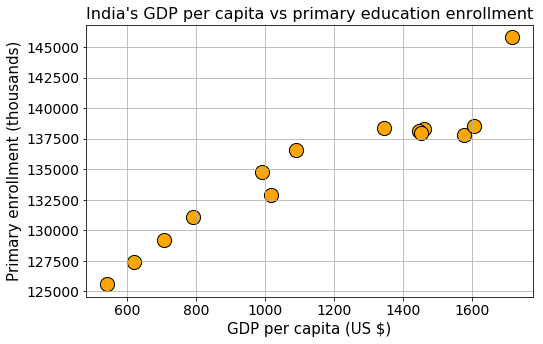

In [74]:
plt.figure(figsize=(8,5))
plt.title("India's GDP per capita vs primary education enrollment",fontsize=16)
plt.scatter(primary_enrollment_with_gdp['GDP'],
            primary_enrollment_with_gdp['Enrollments (Thousands)'],
           edgecolor='k',color='orange',s=200)
plt.xlabel("GDP per capita (US $)",fontsize=15)
plt.ylabel("Primary enrollment (thousands)",fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

### Connecting to a database and writing this values in a table

We start by importing the `sqlite3` module of Python and then use the `connect` function to connect to a database. 

If you already have some experience with database then you will notice that we are not using any server address, user name, password or similar kind of credentials to connect to a database. That is because in `sqlite3` we do not need them. The main database engine is embedded. But for a different database like Postgresql or MySQL we will need to connect to them using those credentials.

We designate `Year` as the PRIMARY KEY of this table.

In [75]:
import sqlite3

In [76]:
with sqlite3.connect("Education_GDP.db") as conn:
    cursor = conn.cursor()
    cursor.execute("CREATE TABLE IF NOT EXISTS \
                   education_gdp(Year INT, Enrollment FLOAT, GDP FLOAT, PRIMARY KEY (Year))")

### Then we run a loop with the dataset rows one by one to insert them in the table

In [77]:
with sqlite3.connect("Education_GDP.db") as conn:
    cursor = conn.cursor()
    for i in range(14):
        year = int(primary_enrollment_with_gdp.iloc[i]['Year'])
        enrollment = primary_enrollment_with_gdp.iloc[i]['Enrollments (Thousands)']
        gdp = primary_enrollment_with_gdp.iloc[i]['GDP']
        #print(year,enrollment,gdp)
        cursor.execute("INSERT INTO education_gdp (Year,Enrollment,GDP) VALUES(?,?,?)",(year,enrollment,gdp))

### If we look at the current folder, we should see a file `Education_GDP.db` and if we can examine that using a database viewer program, we can see the data transferred there.

### Summary

In this notebook, we examined a complete data wrangling flow including,
* reading data from web and local drive,
* filtering, 
* cleaning,
* quick visualization
* imputation,
* indexing
* merging
* writing back to a database table

We also wrote custom functions to transform some of the data and saw how to handle situations where we may get error reading the file.

**Students are encouraged to try extracting various data from these files and answer their own questions about nations' socio-economic factors**